<div align=right>
LAP3 EMLCT Introduction to Automatic Learning<br>
Elisa Rodríguez Forcada<br>
María García-Abadillo Velasco<br>
Fall 2023
</div>

<h1 align=center> 🔎 SMS SPAM COLLECTION: Exploratory Data Analysis</h1>

This Jupyter notebook serves as a quantitative analysis of the project's train and development set (as of now referred as train-dev set), complementing the paper titled _Size Does Matter: Preprocessing Methods for Enhancing Machine
Learning Algorithms in SMS Spam Detection_.
The associated paper can be found on [GITHUB](https://github.com/mariagabv/sms-classifier-WEKA.git).

In this notebook, the following points will be covered:
- General analysis on a sentence level for the train-dev set,
- General analysis on a token level for the train set (64% of the data)
- General analysis on a token level for the dev set (16% of the data)
- General analysis on a token level for the test set (20% of the data)
- Analysis on a token level for the train-dev set:
    - General analysis
    - Visualization
    - Example extraction
- Emoji Analysis

In [8]:
import sys
sys.path.append('COPY PATH HERE')

In [9]:
import numpy as np
import regex as re
import nltk
from nltk.tokenize import word_tokenize
from utils import (get_sentences,
                   get_stats,
                   tokenizer,
                   get_stats_tokens,
                   get_basics_tokens,
                   get_advanced_tokens,
                   extract_emojis,
                   count_emojis,
                   sentence_parser_emoji,
                   plot_custom_boxplots)
nltk.download('punkt')
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Import train-dev file
filepath = '../train_and_dev.arff'
# Import train file
filepath_train = '../datasets/train.arff'
# Import dev file
filepath_dev = '../datasets/dev.arff'
# Import test file
filepath_test = '../datasets/test.arff'

In [11]:
# Extract ham and spam messages separately for the train-dev
ham, spam = get_sentences(filepath)

## Analysis on a sentence level (train-dev)

In the following snippets, the analysis for the train-dev set before tokenization is presented. In total, it comprises 4458 instances. The sentence length is measured in charachters. 

In [41]:
print("Ham")
get_stats(ham)

Ham
Total sentences: 3861
Average sentence length: 72
Minimum sentence length: 2
Maximum sentence length: 909
Percentile 25, length: 34.0
Percentile 50, length: 93.0


In [37]:
print("Spam")
get_stats(spam)

Spam
Total sentences: 597
Average sentence length: 139
Minimum sentence length: 18
Maximum sentence length: 223
Percentile 25, length: 132.0
Percentile 50, length: 157.0


## Analysis on a token level for train

Next, the train set is tokenized and separatedly analysed.

In [14]:
# Extract ham and spam messages separately for the train
ham_train, spam_train = get_sentences(filepath_train)

In [15]:
tokens_spam_train, tokens_list_spam_train = get_stats_tokens(spam_train)
tokens_ham_train, tokens_list_ham_train = get_stats_tokens(ham_train)

In [42]:
print("Train set")
get_basics_tokens(tokens_ham_train, tokens_list_ham_train, tokens_spam_train, tokens_list_spam_train)

Train set
Total tokens: 66876
Spam tokens: 13381
Ham tokens: 53495


## Analysis on a token level for dev

Following, the development set is tokenized and analysed separatedly from the train set. 

In [17]:
# Extract ham and spam messages separately for the DEV
ham_dev, spam_dev = get_sentences(filepath_dev)

In [18]:
tokens_spam_dev, tokens_list_spam_dev = get_stats_tokens(spam_dev)
tokens_ham_dev, tokens_list_ham_dev = get_stats_tokens(ham_dev)

In [40]:
print("Development set")
get_basics_tokens(tokens_ham_dev, tokens_list_ham_dev, tokens_spam_dev, tokens_list_spam_dev)

Development set
Total tokens: 16449
Spam tokens: 3345
Ham tokens: 13104


## Analysis on a token level for test 

Thirdly, the test set is also analysed. Since the test set must remain blind both to the model and the authors, no further analyses will be conducted.

In [20]:
# Extract ham and spam messages separately for the test
ham_test, spam_test = get_sentences(filepath_test)

In [21]:
tokens_spam_test, tokens_list_spam_test = get_stats_tokens(spam_test)
tokens_ham_test, tokens_list_ham_test = get_stats_tokens(ham_test)

In [43]:
print("Development set")
get_basics_tokens(tokens_ham_test, tokens_list_ham_test, tokens_spam_test, tokens_list_spam_test)

Development set
Total tokens: 20485
Spam tokens: 4084
Ham tokens: 16401


## Analysis on a token level for train-dev set

Finally, the analysis for the train-dev is performed. This is the 80% of the data on which the models will be trained.

In [23]:
tokens_spam, tokens_list_spam = get_stats_tokens(spam)
tokens_ham, tokens_list_ham = get_stats_tokens(ham)

In [46]:
print("Train-Dev set")
get_basics_tokens(tokens_ham, tokens_list_ham, tokens_spam, tokens_list_spam)

Train-Dev set
Total tokens: 83325
Spam tokens: 16726
Ham tokens: 66599


We will conduct the same analysis at the token level as we did at the sentence level to gain a more comprehensive understanding of their respective characteristics. Please note that the following token information is solely informative, as we will not use the nltk library for tokenization in our experiments, but rather the tokenizers provided by WEKA.

In [44]:
print("Ham Statistics for train-dev:")
get_advanced_tokens(tokens_ham, tokens_list_ham)

Ham Statistics for train-dev:
Average sentence length (tokens): 17
Minimum sentence length (tokens): 1
Maximum sentence length (tokens): 185
Percentile 25, length: 8.0
Percentile 75, length: 22.0


In [45]:
print("Spam Statistics for train-dev:")
get_advanced_tokens(tokens_spam, tokens_list_spam)

Spam Statistics for train-dev:
Average sentence length (tokens): 28
Minimum sentence length (tokens): 2
Maximum sentence length (tokens): 46
Percentile 25, length: 25.0
Percentile 75, length: 32.0


Next, this data is presented in a boxplot for space efficiency in the final paper.

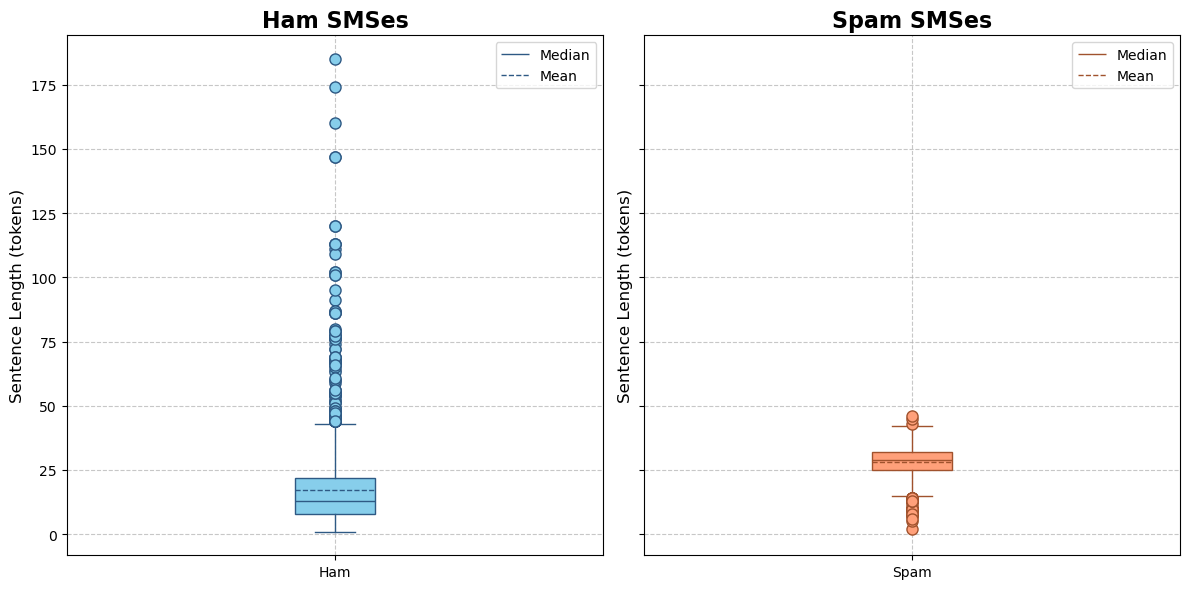

In [27]:
ham_data = [len(sentence) for sentence in tokens_list_ham]  
spam_data = [len(sentence) for sentence in tokens_list_spam]  


plot_custom_boxplots(ham_data, spam_data)

In the forthcoming section, we will analyze specific cases from our data to gain a better comprehension of the outliers. Initially, we will observe the briefest and lengthiest SMS within every category.

In [28]:
sentence_lengths = [len(sentence) for sentence in tokens_list_ham]
min_idx = np.argmin(sentence_lengths)
max_idx = np.argmax(sentence_lengths)
print(f"ham longest sentence index: {max_idx}\n{ham[2425]}")
print()
print(f"ham shortest sentence index: {min_idx}\n{ham[568]}")

ham longest sentence index: 2425
The last thing i ever wanted to do was hurt you. And i didnt think it would have. Youd laugh, be embarassed, delete the tag and keep going. But as far as i knew, it wasnt even up. The fact that you even felt like i would do it to hurt you shows you really dont know me at all. It was messy wednesday, but it wasnt bad. The problem i have with it is you HAVE the time to clean it, but you choose not to. You skype, you take pictures, you sleep, you want to go out. I dont mind a few things here and there, but when you dont make the bed, when you throw laundry on top of it, when i cant have a friend in the house because im embarassed that theres underwear and bras strewn on the bed, pillows on the floor, thats something else. You used to be good about at least making the bed.

ham shortest sentence index: 568
Okie


The longest ham instance details a complex emotional expression regarding a perceived misunderstanding. In contrast, the shortest ham message (index 568) consists of some short of monosyllable.

In [29]:
sentence_lengths = [len(sentence) for sentence in tokens_list_spam]
min_idx = np.argmin(sentence_lengths)
max_idx = np.argmax(sentence_lengths)
print(f"spam longest sentence index: {max_idx}\n{spam[542]}")
print()
print(f"spam shortest sentence index: {min_idx}\n{spam[135]}")

spam longest sentence index: 542
URGENT! Your mobile number *************** WON a £2000 Bonus Caller prize on 10/06/03! This is the 2nd attempt to reach you! Call 09066368753 ASAP! Box 97N7QP, 150ppm

spam shortest sentence index: 135
ringtoneking 84484


The longest spam instance represents a classic spam message, urgently claiming a prize and prompting a call to a specific number. Conversely, the shortest spam message is succinct and does not include any classical request.

Finally, we assume that we will find several emoticons in our dataset. We will try to extract all of them using the following pattern:

``[:;][-]?[\']?[)(\*\$\|BDOSdPp/\\]+(?<![:/\\]``

In [33]:
# Import train-dev file before emoji replacement. This file was not used for the experiments.
extract_emojis("../EDA/train_emojis.arff")

[':-)',
 ':-)',
 ':)',
 ':)',
 ':-)',
 ':-)',
 ':)',
 ':)',
 ';D',
 ':)',
 ':-D',
 ':-)',
 ':-)',
 ':)',
 ';D',
 ':)',
 ':)',
 ':)',
 ':-)',
 ':-)',
 ':)',
 ':)',
 ':)',
 ':-)',
 ':)',
 ':)',
 ':-)',
 ';-)',
 ':-)',
 ':-)',
 ':(',
 ':-(',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ';D',
 ';D',
 ';D',
 ':-)',
 ':)',
 ':-)',
 ':-)',
 ':-)',
 ':)',
 ':-)',
 ':)',
 ':-)',
 ':-)',
 ':-)',
 ';D',
 ';D',
 ':)',
 ';-)',
 ':)',
 ';D',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ';-)',
 ':-)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':-)',
 ':)',
 ':)',
 ':-)',
 ':)',
 ';D',
 ':)',
 ':)',
 ':-)',
 ':(',
 ':)',
 ':)',
 ';D',
 ':)',
 ':)',
 ':*',
 ';)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':-)',
 ':-(',
 ':)',
 ':-)',
 ':-)',
 ':-)',
 ':(',
 ':)',
 ';D',
 ':-(',
 ':-)',
 ':)',
 ':)',
 ':-P',
 ':)',
 ':)',
 ':)',
 ':)',
 ':(',
 ':-)',
 ':)',
 ':)',
 ':)',
 ':-(',
 ';-(',
 ':-)',
 ':-)',
 ':)',
 ':-)',
 ':)',
 ':-)',
 ':-)',
 ':-)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':O',
 '

In [34]:
ham_messages, spam_messages = sentence_parser_emoji("../EDA/train_emojis.arff")

In [35]:
print("Total number of emojis in ham: ", count_emojis(ham_messages))
print("Total number of emojis in spam: ",count_emojis(spam_messages))

Total number of emojis in ham:  366
Total number of emojis in spam:  1


This imbalance suggests that emoji are more commonly used in non-spam messages, while spammers tend to rely less on this form of expression. This encourages us to replace any emoji that matches this pattern with the token [EMOJI] so that they are all treated equally and are not lost in the tokenisation process. Further emoji preprocessing is an interesting line of research for the future.